<h3> Multiclass Logicstic Regression </h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

data = pd.read_csv('./Datasets/iris.csv')

- Identifying classes of flowers

In [2]:
# Iris dataset has data of flowers categorized in 3 types
print(data['species'].unique()) # ['setosa' 'versicolor' 'virginica']

['setosa' 'versicolor' 'virginica']


- Some Visualization

<Axes: xlabel='species', ylabel='count'>

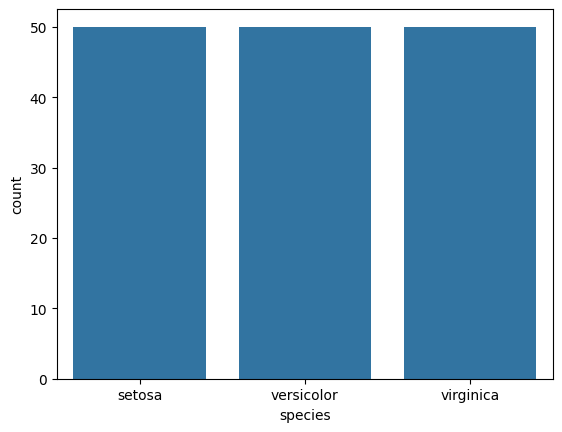

In [3]:
sns.countplot(x='species'  , data=data)

<Axes: xlabel='petal_length', ylabel='petal_width'>

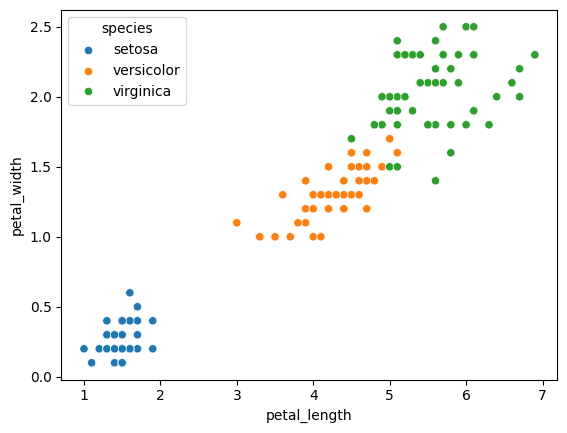

In [4]:
sns.scatterplot(data=data , x='petal_length' , y='petal_width' , hue='species')

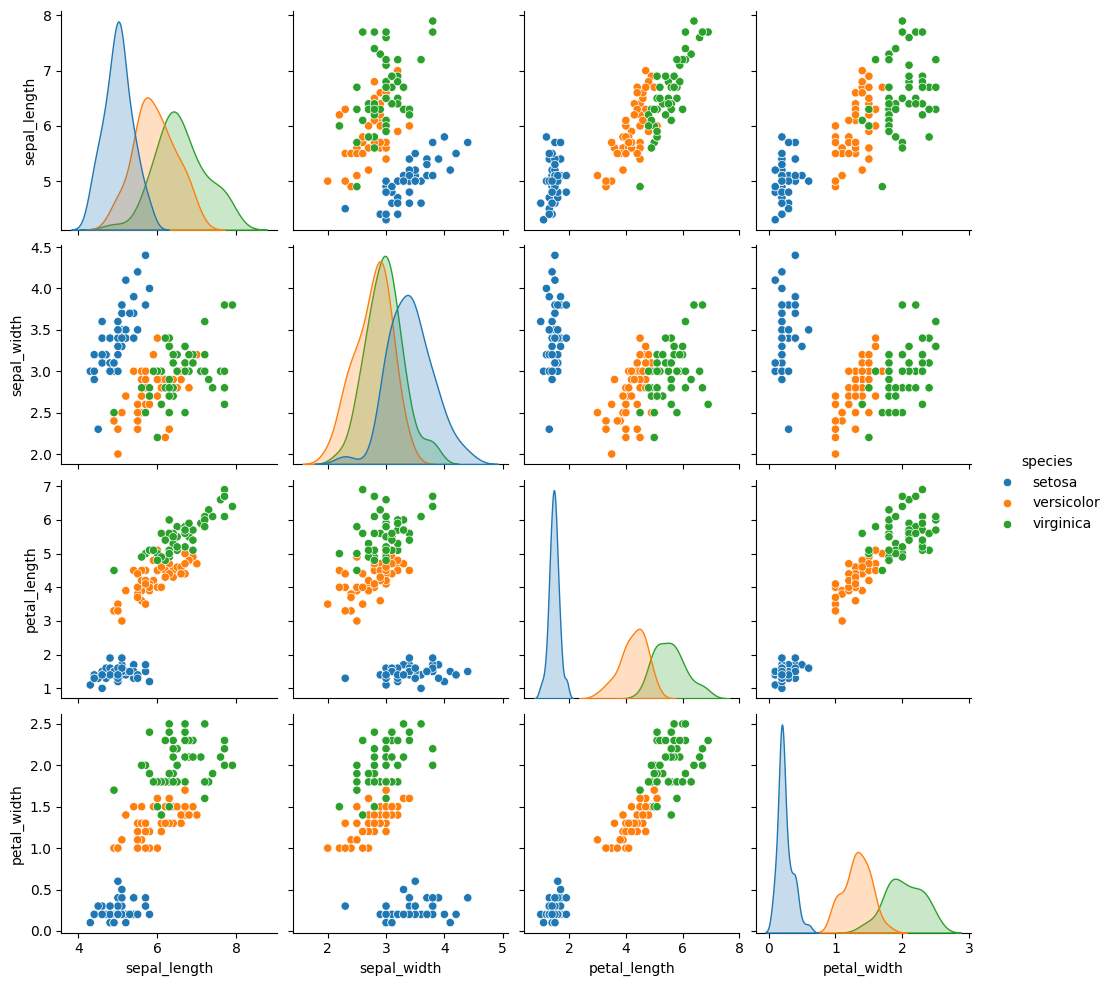

In [5]:
sns.pairplot(data=data , hue='species')

<Axes: >

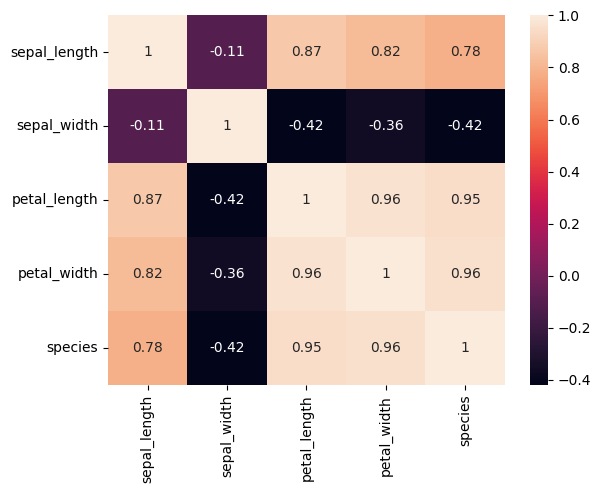

In [7]:
# Mapping for visualization purposes
data['species'] = data['species'].map({'setosa':1 , 'versicolor':2 , 'virginica':3})
sns.heatmap(data=data.corr() , annot=True)

- It is not necessary to hot-encode values for Logistic Regression with Scikit-Learn

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('species' , axis=1)
y = data['species']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
import warnings
# supressing the warings , as the 'l1_ratio' is only used when penalty is 'elastic'.
warnings.filterwarnings("ignore", message="l1_ratio parameter is only used when penalty is 'elasticnet'")

- Model making

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV 

# Applying OVR - One vs Rest test for multi-class Logicstic Regression
OVR_MODEL  = OneVsRestClassifier(estimator=LogisticRegression(solver='saga' , max_iter=5000))

params_grid = {
    'estimator__penalty': ['l1' ,'l2' , 'elasticnet'],
    'estimator__l1_ratio': np.linspace(0, 1, 20),
    'estimator__C': np.linspace(0.01, 2, 20)  
} 

GridSearchModel = GridSearchCV(estimator=OVR_MODEL , param_grid=params_grid)
GridSearchModel.fit(X_train , y_train)

# Best params
print(GridSearchModel.best_params_) 

{'estimator__C': np.float64(1.4763157894736842), 'estimator__l1_ratio': np.float64(0.0), 'estimator__penalty': 'l1'}


- Prediction accuracy on test set

In [12]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , confusion_matrix

y_pred = GridSearchModel.predict(X_test)

print(accuracy_score(y_test , y_pred))
print(precision_score(y_test , y_pred , average='macro'))
print(recall_score(y_test , y_pred , average='macro'))
print(confusion_matrix(y_test , y_pred))

1.0
1.0
1.0
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


- Testing with sample data

In [17]:
from sklearn.metrics import classification_report

test_data = pd.read_csv('./Datasets/iris_test.csv')
test_data['species'] = test_data['species'].map({'setosa':1 , 'versicolor':2 , 'virginica':3})

predictions = GridSearchModel.predict(scaler.transform(test_data.drop('species' , axis=1)))

print(confusion_matrix(test_data['species'] , predictions))
print(classification_report(test_data['species'] , predictions))

[[4 0 0]
 [0 2 1]
 [0 0 3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      0.67      0.80         3
           3       0.75      1.00      0.86         3

    accuracy                           0.90        10
   macro avg       0.92      0.89      0.89        10
weighted avg       0.93      0.90      0.90        10

